In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
%run ./Combine_csv.ipynb

In [3]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [4]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Sports\Combined CSV\ "
suffix_dir = 'combined_sports-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [5]:
sports = pd.read_csv(today_csv)

In [6]:
sports.head()

,Newspaper,Heading,Date,Time,URL
0,Indian Express,"LiveWorld Cup, SA vs BAN: De Kock run out afte...",2019-06-02,8:36:12 pm,https://indianexpress.com/article/sports/crick...
1,Indian Express,World Cup 2019: Bangladesh register their high...,2019-06-02,7:59:58 pm,https://indianexpress.com/article/sports/crick...
2,Indian Express,Virat Kohli hurts thumb during nets but 'doing...,2019-06-02,4:35:48 pm,https://indianexpress.com/article/sports/crick...
3,Indian Express,"Neymar accused of rape, father says player set up",2019-06-02,7:09:10 pm,https://indianexpress.com/article/sports/footb...
4,Indian Express,LiveSouth Africa vs Bangladesh Live Cricket Sc...,2019-06-02,20:36:12:00,https://indianexpress.com/article/sports/crick...


In [7]:
sports['Newspaper'].value_counts()

Time of India     59
India Today       25
Indian Express    16
Name: Newspaper, dtype: int64

In [8]:
sports.shape

(100, 5)

In [9]:
#df=education[education['Date']==Today_date]
df=sports

Heading = df['Heading']

In [10]:
df.head()

,Newspaper,Heading,Date,Time,URL
0,Indian Express,"LiveWorld Cup, SA vs BAN: De Kock run out afte...",2019-06-02,8:36:12 pm,https://indianexpress.com/article/sports/crick...
1,Indian Express,World Cup 2019: Bangladesh register their high...,2019-06-02,7:59:58 pm,https://indianexpress.com/article/sports/crick...
2,Indian Express,Virat Kohli hurts thumb during nets but 'doing...,2019-06-02,4:35:48 pm,https://indianexpress.com/article/sports/crick...
3,Indian Express,"Neymar accused of rape, father says player set up",2019-06-02,7:09:10 pm,https://indianexpress.com/article/sports/footb...
4,Indian Express,LiveSouth Africa vs Bangladesh Live Cricket Sc...,2019-06-02,20:36:12:00,https://indianexpress.com/article/sports/crick...


In [11]:
df['Newspaper'].value_counts()

Time of India     59
India Today       25
Indian Express    16
Name: Newspaper, dtype: int64

In [12]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [13]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopset = set(stopwords.words('english'))

In [15]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [16]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [18]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [19]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [20]:
 Heading_tokenized[:10]    # 10 out of all

['liveworld', 'cup', 'sa', 'vs', 'ban', 'de', 'kock', 'run', 'out', 'after']

In [21]:
Heading_stemmed[:10]   # 10 out of all

['liveworld', 'cup', 'sa', 'vs', 'ban', 'de', 'kock', 'run', 'out', 'after']

In [22]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [23]:
words_frame.head(10)

,words
liveworld,liveworld
cup,cup
sa,sa
vs,vs
ban,ban
de,de
kock,kock
run,run
out,out
after,after


TF-IDF

In [24]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [25]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [26]:
print(tfidf_matrix.shape)

(100, 1824)


In [27]:
print(tfidf_matrix[0])

  (0, 978)	0.19686215215639832
  (0, 374)	0.08723789599698413
  (0, 1343)	0.14141510423343434
  (0, 1684)	0.13670418438429355
  (0, 111)	0.1602136469424323
  (0, 870)	0.1806449302510869
  (0, 1328)	0.1806449302510869
  (0, 605)	0.1806449302510869
  (0, 1528)	0.1806449302510869
  (0, 979)	0.19686215215639832
  (0, 405)	0.19686215215639832
  (0, 1349)	0.1806449302510869
  (0, 1685)	0.1806449302510869
  (0, 112)	0.19686215215639832
  (0, 871)	0.1806449302510869
  (0, 1329)	0.1806449302510869
  (0, 606)	0.1806449302510869
  (0, 980)	0.19686215215639832
  (0, 406)	0.19686215215639832
  (0, 1350)	0.1806449302510869
  (0, 1686)	0.19686215215639832
  (0, 113)	0.19686215215639832
  (0, 872)	0.1806449302510869
  (0, 1330)	0.1806449302510869
  (0, 981)	0.19686215215639832
  (0, 407)	0.19686215215639832
  (0, 1351)	0.19686215215639832
  (0, 1687)	0.19686215215639832
  (0, 114)	0.19686215215639832
  (0, 873)	0.1806449302510869


In [28]:
vectorizer.get_feature_names()[:] 

["'m",
 "'m fast",
 "'m fast bowler",
 "'m fast bowler say",
 "'m fine",
 "'m fine coach",
 "'m fine coach 's",
 "'m medium",
 "'m medium pacer",
 "'m medium pacer 'm",
 "'s",
 "'s asian",
 "'s asian cup",
 "'s best",
 "'s best world",
 "'s best world cup",
 "'s bowl",
 "'s bowl attack",
 "'s bowl attack better",
 "'s doubl",
 "'s hockey",
 "'s hockey coach",
 "'s hockey coach graham",
 "'s hockey team",
 "'s hockey team beat",
 "'s johanna",
 "'s johanna konta",
 "'s johanna konta power",
 "'s men",
 "'s men women",
 "'s men women team",
 "'s view",
 "'s view place",
 "'s view place grant",
 "'s wc",
 "'s wc open",
 "'s world",
 "'s world cup",
 "'s world cup open",
 '12th',
 '12th french',
 '12th french open',
 '12th french open quarter-fin',
 'accus',
 'accus rape',
 'accus rape father',
 'accus rape father say',
 'accus rape woman',
 'accus rape woman pari',
 'afc',
 'afc women',
 "afc women 's",
 "afc women 's asian",
 'africa',
 'africa clash',
 'africa vs',
 'africa vs banglades

In [29]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity


In [31]:
dist = cosine_similarity(tfidf_matrix)

In [32]:
dist.shape

(100, 100)

In [33]:
print(dist)

[[1.         0.00962009 0.         ... 0.         0.         0.        ]
 [0.00962009 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.0938128  0.08707831]
 [0.         0.         0.         ... 0.0938128  1.         0.07465092]
 [0.         0.         0.         ... 0.08707831 0.07465092 1.        ]]


## K-Means

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [35]:
n_clusters = list (range (15,25))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 15, silhouette score is 0.12428120858324057)
For n = 16, silhouette score is 0.12099570050258623)
For n = 17, silhouette score is 0.15294638440661099)
For n = 18, silhouette score is 0.15189522563395497)
For n = 19, silhouette score is 0.16350099585672953)
For n = 20, silhouette score is 0.18614122226256036)
For n = 21, silhouette score is 0.2043055691918498)
For n = 22, silhouette score is 0.22931435880632464)
For n = 23, silhouette score is 0.20130263129432335)
For n = 24, silhouette score is 0.22070377123019166)


In [36]:
n_score

16

In [37]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
clusters = km.labels_.tolist()

In [39]:
df['Cluster'] = clusters

In [40]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [41]:
df['Cluster'].value_counts()

0     23
2     11
11     9
15     8
8      8
10     7
4      7
1      6
7      4
14     3
6      3
5      3
13     2
12     2
9      2
3      2
Name: Cluster, dtype: int64

## Plotting the points

In [42]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [43]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14', 15: 'Cluster 15'}


In [44]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#0B7255', 1: '#32E8FE', 2: '#518373', 3: '#374E4F', 4: '#1F3F39', 5: '#2E26A8', 6: '#D09B8E', 7: '#1B5C81', 8: '#8F7AD7', 9: '#235561', 10: '#20D2EF', 11: '#4C7742', 12: '#B7FA54', 13: '#83150D', 14: '#452E90', 15: '#BC09BF'}


In [45]:
type(cluster_colors)

dict

In [46]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.001516,-0.004703,14,"LiveWorld Cup, SA vs BAN: De Kock run out afte..."
1,-0.014659,-0.007579,2,World Cup 2019: Bangladesh register their high...
2,-0.011220,0.004488,8,Virat Kohli hurts thumb during nets but 'doing...
3,0.012632,0.009498,4,"Neymar accused of rape, father says player set up"
4,0.004641,0.012724,2,LiveSouth Africa vs Bangladesh Live Cricket Sc...


In [47]:
groups = df_plot.groupby('label')

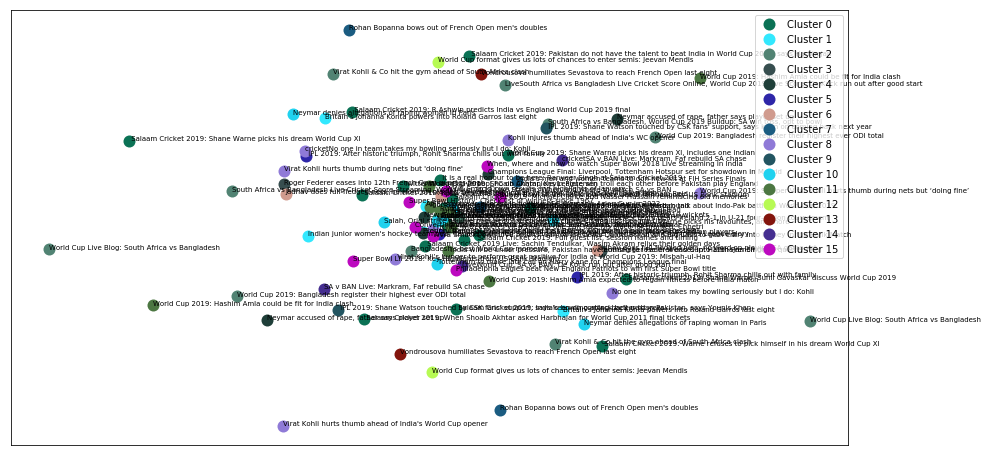

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [49]:
#centers = np.array(km.cluster_centers_)

In [50]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [51]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [52]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [53]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [54]:
#df.sort_values(by='Cluster')

In [55]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [56]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [57]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [58]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [59]:
#df_less

In [60]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [61]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [62]:
#Result

In [63]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [64]:
#df_more

In [65]:
#Result = Result.append(df_more)

In [66]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [67]:
##Result

In [68]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [69]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [70]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,India Today,"Salaam Cricket 2019: Full guest list, se...",2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0
1,India Today,Salaam Cricket 2019: R Ashwin predicts India ...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0
2,India Today,Salaam Cricket 2019: When Shoaib Akhtar asked...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0
3,India Today,"Salaam Cricket 2019: Harbhajan, Misbah talk a...",2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0
4,India Today,Salaam Cricket 2019: India's bowling attack b...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0


In [71]:
vectorizer = TfidfVectorizer()

In [72]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [73]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [74]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.09, 0.14, 0.12, 0.14, 0.1, 0.11, 0.05, 0.08, 0.07, 0.06, 0.09, 0.17, 0.12, 0.18, 0.07, 0.07, 0.15, 0.07, 0.15, 0.05, 0.19, 0.06, 0.09]


[0.24, 0.37, 0.23, 0.21, 0.37, 0.26]


[0.22, 0.36, 0.15, 0.19, 0.36, 0.22, 0.24, 0.26, 0.26, 0.28, 0.23]


[0.9, 0.9]


[0.17, 0.16, 0.2, 0.32, 0.17, 0.32, 0.15]


[0.39, 0.7, 0.7]


[0.67, 0.67, 0.33]


[0.63, 0.28, 0.49, 0.63]


[0.17, 0.25, 0.35, 0.29, 0.32, 0.34, 0.22, 0.28]


[1.0, 1.0]


[0.31, 0.19, 0.2, 0.21, 0.38, 0.18, 0.38]


[0.18, 0.18, 0.33, 0.25, 0.16, 0.16, 0.13, 0.33, 0.2]


[1.0, 1.0]


[1.0, 1.0]


[0.42, 0.67, 0.65]


[0.2, 0.18, 0.2, 0.17, 0.26, 0.22, 0.15, 0.21]




In [75]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [76]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.105217
1     0.280000
2     0.251818
3     0.900000
4     0.212857
5     0.596667
6     0.556667
7     0.507500
8     0.277500
9     1.000000
10    0.264286
11    0.213333
12    1.000000
13    1.000000
14    0.580000
15    0.198750
Name: cluster_similarity_value, dtype: float64

In [77]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].std()

Cluster
0     0.042839
1     0.071554
2     0.064159
3     0.000000
4     0.074769
5     0.178979
6     0.196299
7     0.165404
8     0.061818
9     0.000000
10    0.089974
11    0.073824
12    0.000000
13    0.000000
14    0.138924
15    0.033568
Name: cluster_similarity_value, dtype: float64

In [78]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,"Salaam Cricket 2019: Full guest list, se...",2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0,0.09
1,India Today,Salaam Cricket 2019: R Ashwin predicts India ...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0,0.14
2,India Today,Salaam Cricket 2019: When Shoaib Akhtar asked...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0,0.12
3,India Today,"Salaam Cricket 2019: Harbhajan, Misbah talk a...",2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.14
4,India Today,Salaam Cricket 2019: India's bowling attack b...,2019-06-02,20:40,https://www.indiatoday.in/sports/cricket-world...,0,0.10
5,India Today,Salaam Cricket 2019: Kapil Dev greatest India...,2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0,0.11
6,Time of India,Italian Danilo Petrucci takes first MotoGP win...,2019-06-02,19:17:00,https://timesofindia.indiatimes.com/sports/rac...,0,0.05
7,India Today,"Salaam Cricket 2019 Live: Sachin Tendulkar, W...",2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0,0.08
8,Time of India,"WWE Royal Rumble 2019 results: Seth Rollins, B...",2019-01-28,13:27:00,https://timesofindia.indiatimes.com/sports/wwe...,0,0.07
9,Time of India,Revealed: The origins of Rusev Day,2018-07-12,13:40:00,https://timesofindia.indiatimes.com/sports/wwe...,0,0.06


In [79]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [80]:
col=df_sorted.columns

In [81]:
temp_more =[]
temp_less  =[]

In [82]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if(cluster_mean<0.50):
            if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])
        else:
            if (cluster.iloc[i]['cluster_similarity_value']<0.5):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])

In [83]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [84]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [85]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,3,India Today,"Salaam Cricket 2019: Harbhajan, Misbah talk a...",2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.14
1,24,Time of India,Britain's Johanna Konta powers into Roland Gar...,2019-06-02,17:40:00,https://timesofindia.indiatimes.com/sports/ten...,1,0.37
2,33,Time of India,World Cup Live Blog: South Africa vs Bangladesh,2019-06-02,19:59:00,https://timesofindia.indiatimes.com/sports/cri...,2,0.36
3,40,Time of India,tennisRoger Federer eases into 12th French Ope...,2019-06-02,19:39:00,https://timesofindia.indiatimes.com/sports/ten...,3,0.90
4,47,Indian Express,"Neymar accused of rape, father says player set up",2019-06-02,7:09:10 pm,https://indianexpress.com/article/sports/footb...,4,0.32


In [86]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [87]:
Result = Result.append(df_less_similar)

In [88]:
Result = Result.sort_values(by='Cluster')

In [89]:
Result=Result.reset_index().drop(['index'],axis=1)

In [90]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,"Salaam Cricket 2019: Harbhajan, Misbah talk a...",2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.14
1,Time of India,"Out of the shadow of crime, Oshane Thomas shines",2019-06-02,11:24:00,https://timesofindia.indiatimes.com/sports/cri...,0,0.06
2,Time of India,Former Spain striker Reyes killed in car crash,2019-06-01,18:40:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.05
3,Time of India,Twitterati lauds Liverpool FC on Champions Lea...,2019-06-02,08:59:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
4,Time of India,Jurgen Klopp hails 'best night' of his life af...,2019-06-02,08:41:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
5,Time of India,Mohamed Salah lauds 'unbelievable' Liverpool a...,2019-06-02,08:31:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
6,India Today,It is a real honour to be here: Ranveer Singh...,2019-06-02,20:40,https://www.indiatoday.in/sports/video/salaam-...,0,0.09
7,India Today,Salaam Cricket 2019: Michael Clarke and Nasse...,2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.09
8,Time of India,Revealed: The origins of Rusev Day,2018-07-12,13:40:00,https://timesofindia.indiatimes.com/sports/wwe...,0,0.06
9,India Today,"Salaam Cricket 2019 Live: Sachin Tendulkar, W...",2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0,0.08


In [91]:
outname ='Sports-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Sports\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [92]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [93]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,"Salaam Cricket 2019: Harbhajan, Misbah talk a...",2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.14
1,Time of India,"Out of the shadow of crime, Oshane Thomas shines",2019-06-02,11:24:00,https://timesofindia.indiatimes.com/sports/cri...,0,0.06
2,Time of India,Former Spain striker Reyes killed in car crash,2019-06-01,18:40:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.05
3,Time of India,Twitterati lauds Liverpool FC on Champions Lea...,2019-06-02,08:59:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
4,Time of India,Jurgen Klopp hails 'best night' of his life af...,2019-06-02,08:41:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
5,Time of India,Mohamed Salah lauds 'unbelievable' Liverpool a...,2019-06-02,08:31:00,https://timesofindia.indiatimes.com/sports/foo...,0,0.07
6,India Today,It is a real honour to be here: Ranveer Singh...,2019-06-02,20:40,https://www.indiatoday.in/sports/video/salaam-...,0,0.09
7,India Today,Salaam Cricket 2019: Michael Clarke and Nasse...,2019-06-02,20:40,https://www.indiatoday.in/sports/photo/salaam-...,0,0.09
8,Time of India,Revealed: The origins of Rusev Day,2018-07-12,13:40:00,https://timesofindia.indiatimes.com/sports/wwe...,0,0.06
9,India Today,"Salaam Cricket 2019 Live: Sachin Tendulkar, W...",2019-06-02,20:40,https://www.indiatoday.in/sports/story/salaam-...,0,0.08
